Scenario: Retail – Customer Churn Prediction
A retail company wants to predict whether customers will churn (1) or stay loyal (0) based on:
Monthly spend (amount spent in store)
Visits per month (frequency of shopping)
Satisfaction score (1–10 scale)


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("retail_churn_200.csv")


X = df[['Monthly_spend', 'Visits_per_month', 'Satisfaction_score']]
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


model = XGBClassifier(random_state=42, tree_method='hist',n_estimators=100, learning_rate=0.6, max_depth=6, verbosity=0)
model.fit(X_train, y_train)


preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")

target_names = le.inverse_transform([0, 1])
print("\nClassification Report:")
print(classification_report(y_test, preds, target_names=target_names))

Accuracy: 0.9250

Classification Report:
              precision    recall  f1-score   support

          No       0.92      1.00      0.96        34
         Yes       1.00      0.50      0.67         6

    accuracy                           0.93        40
   macro avg       0.96      0.75      0.81        40
weighted avg       0.93      0.93      0.91        40



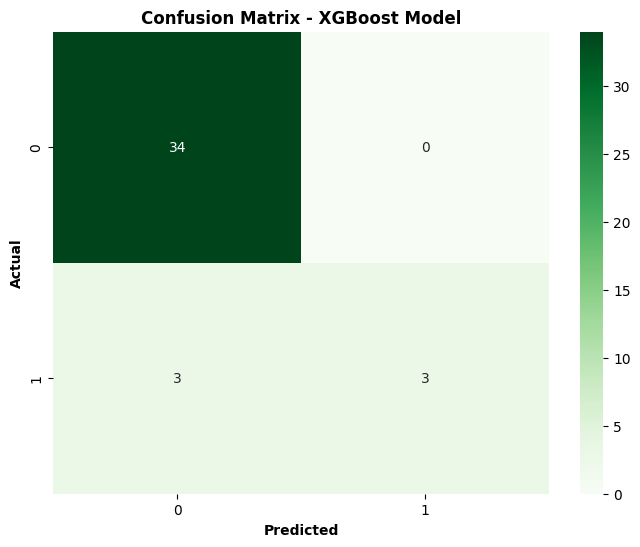

In [18]:

cm = confusion_matrix(y_test, preds)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Confusion Matrix - XGBoost Model', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.show()

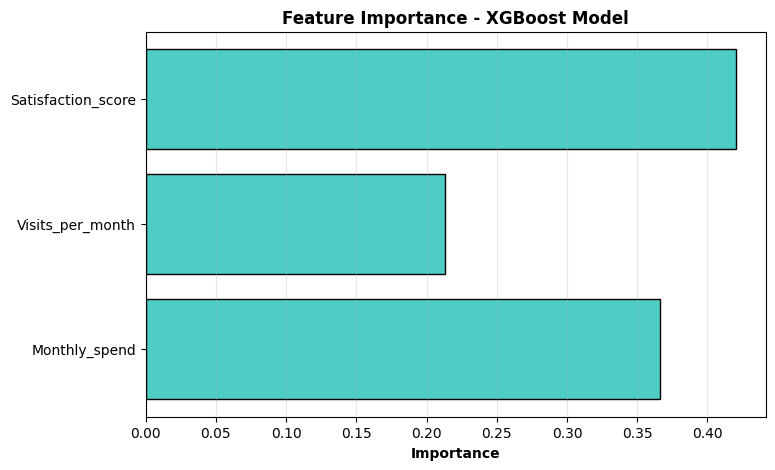

In [19]:

feature_names = ['Monthly_spend', 'Visits_per_month', 'Satisfaction_score']
importances = model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='#4ECDC4', edgecolor='black')
plt.xlabel('Importance', fontweight='bold')
plt.title('Feature Importance - XGBoost Model', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.show()